## Assignment Report
**Name:** Kushal Regmi  
**Roll Number:** 080BCT042

---

## Theoretical Background

### Clustering with KMeans
KMeans is an unsupervised learning algorithm that partitions a dataset into `k` distinct clusters based on feature similarity. It minimizes the variance within each cluster to form compact and well-separated groups.

**Key Concepts:**
- **Centroids:** The center of a cluster.
- **Inertia:** The sum of squared distances from points to their closest cluster center.
- **Silhouette Coefficient:** Measures how similar an object is to its own cluster compared to other clusters.

### Feature Scaling
Feature scaling standardizes features to have a mean of zero and a standard deviation of one, ensuring equal importance of all features during clustering.

### Logistic Regression
Logistic regression is a statistical model for binary classification. It uses a logistic function to model the probability of a binary outcome.

**Key Metrics:**
- **Accuracy:** The ratio of correctly predicted instances.
- **F1 Score:** The harmonic mean of precision and recall.
- **ROC Curve:** Plots the true positive rate against the false positive rate.
- **AUC (Area Under the Curve):** Measures the overall performance of a binary classifier.

---

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  silhouette_score
import numpy as np
from sklearn.model_selection import train_test_split

### Question_1:
**Clustering a real-world data using Kmeans:**

 In the provided wine dataset, perform Kmeans clustering. Perform multiple Kmeans by selecting different value for cluster- size ‘K’ and evaluate them using silhouette coefficient to select the best value of K for given data set. Next, perform feature scaling of the data assuming normal distribution and perform multiple Kmeans again to select the best value for ‘K’ as before. Compare the results.

In [86]:
df = pd.read_csv('./wine-clustering.csv')

df.head()



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [87]:
# performing the kmeans without scaling the data.
k_range= range(2,12)

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(
    n_clusters=k,          # Number of clusters
    init='k-means++',      # Smart initialization method
    random_state=42        # Set a random seed for reproducibility
    )
    
    cluster_labels = kmeans.fit_predict(df)
    score = silhouette_score(df, cluster_labels)
    print(f"Silhouette Score for {k} clusters: {score:.3f}")
    
    silhouette_scores.append(score)


Silhouette Score for 2 clusters: 0.657
Silhouette Score for 3 clusters: 0.560
Silhouette Score for 4 clusters: 0.567
Silhouette Score for 5 clusters: 0.508
Silhouette Score for 6 clusters: 0.542
Silhouette Score for 7 clusters: 0.559
Silhouette Score for 8 clusters: 0.529
Silhouette Score for 9 clusters: 0.505
Silhouette Score for 10 clusters: 0.511
Silhouette Score for 11 clusters: 0.508


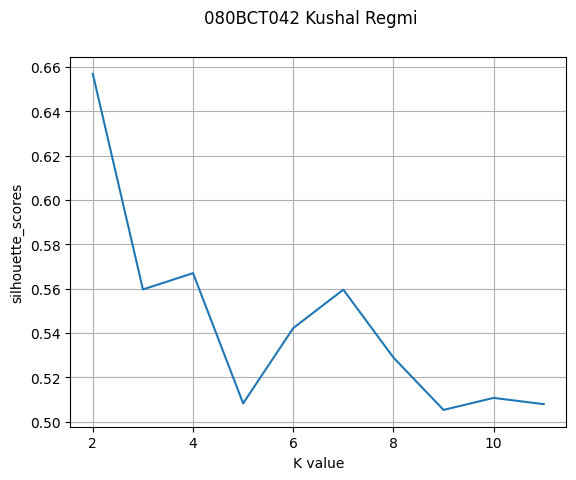

In [88]:
# plotting the graph 
plt.plot(k_range, silhouette_scores)
plt.suptitle("080BCT042 Kushal Regmi")
plt.xlabel("K value")
plt.ylabel('silhouette_scores')
plt.grid()
plt.show()


From the above graph we can conclude that k=2 is suitable for the given dataset

In [89]:
#  Fit the best model and inspect the cluster assignments
best_k = 2 # Known from dataset structure
kmeans = KMeans(
    n_clusters=2,          # Number of clusters
    init='k-means++',      # Smart initialization method
    random_state=42        # Set a random seed for reproducibility
    )

y_predict = kmeans.fit_predict(df) # creating labels


original_center = kmeans.cluster_centers_ 

In [90]:
# evaluating the silhoutte score for k=2
score = silhouette_score( df, y_predict)

print(f"Silhouette Score for {2} clusters: {score:.3f}")

Silhouette Score for 2 clusters: 0.657


In [91]:
new_df= df.copy()

# performing scaling on the dataset using StandardScaler 
scaler = StandardScaler()
new_df[new_df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    new_df.select_dtypes(include=['float64', 'int64'])
)

new_df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [92]:
# applying the k_means algorithm on the new_df
# performing the kmeans without scaling the data.
k_range= range(2,12)

scaled_silhouette_scores = []

for k in k_range:
    kmeans = KMeans(
    n_clusters=k,          # Number of clusters
    init='k-means++',      # Smart initialization method
    random_state=42        # Set a random seed for reproducibility
    )
    
    cluster_labels = kmeans.fit_predict(new_df)
    score = silhouette_score(new_df, cluster_labels)
    print(f"Silhouette Score for {k} clusters: {score:.3f}")
    
    scaled_silhouette_scores.append(score)


Silhouette Score for 2 clusters: 0.265
Silhouette Score for 3 clusters: 0.285
Silhouette Score for 4 clusters: 0.254


Silhouette Score for 5 clusters: 0.184
Silhouette Score for 6 clusters: 0.169
Silhouette Score for 7 clusters: 0.173
Silhouette Score for 8 clusters: 0.163
Silhouette Score for 9 clusters: 0.174
Silhouette Score for 10 clusters: 0.140
Silhouette Score for 11 clusters: 0.130


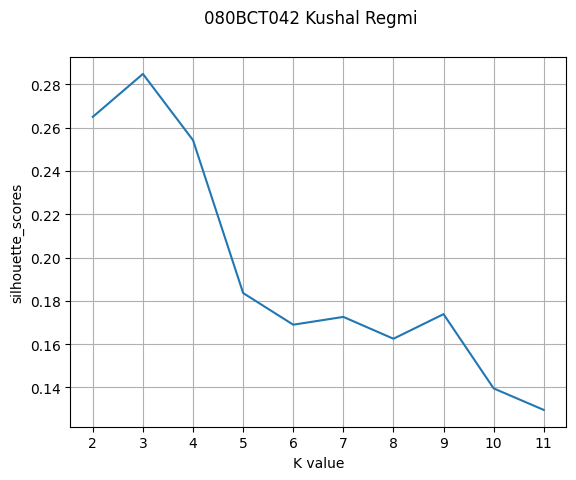

In [93]:
# plotting the graph 
plt.plot(k_range, scaled_silhouette_scores)
plt.suptitle("080BCT042 Kushal Regmi")
plt.xlabel("K value")
plt.xticks(k_range)
plt.ylabel('silhouette_scores')
plt.grid()
plt.show()


Here the best value for the k is 3 with  Silhouette Score : 0.285

In [94]:
# adding the labels to new_df : scaled df 
best_k = 3 # Known from dataset structure
kmeans = KMeans(
    n_clusters=3,          # Number of clusters
    init='k-means++',      # Smart initialization method
    random_state=42        # Set a random seed for reproducibility
    )

y_predict = kmeans.fit_predict(new_df) # creating labels 



new_df['cluster'] = y_predict

scaled_center =kmeans.cluster_centers_ # new center after scaling the data


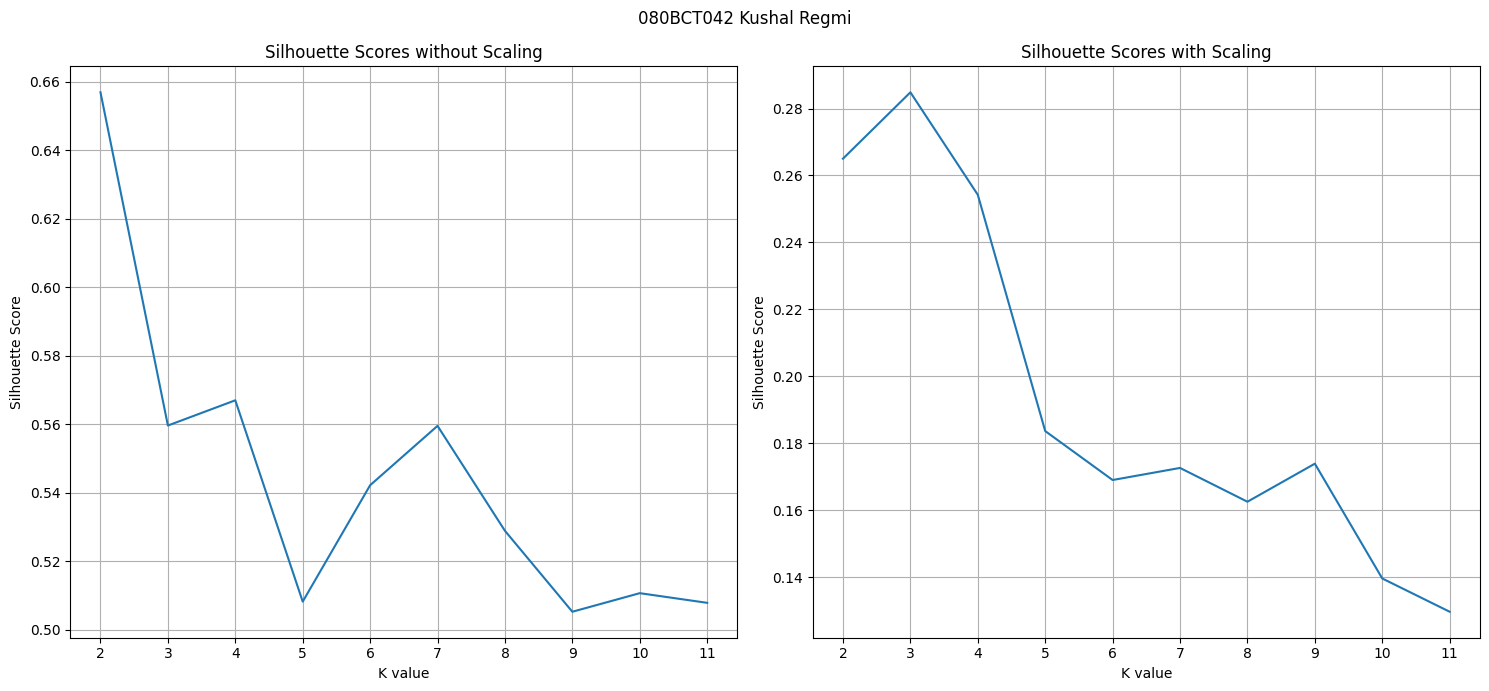

In [95]:
# plt.plot(k_range, scaled_silhouette_scores)
fig, ax = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)
plt.suptitle("080BCT042 Kushal Regmi")

ax[0].plot(k_range, silhouette_scores)
ax[0].set_title('Silhouette Scores without Scaling')
ax[0].set_xlabel('K value')
ax[0].set_xticks(k_range)
ax[0].set_ylabel('Silhouette Score')
ax[0].grid()

ax[1].plot(k_range, scaled_silhouette_scores)
ax[1].set_title('Silhouette Scores with Scaling')
ax[1].set_xlabel('K value')
ax[1].set_xticks(k_range)
ax[1].set_ylabel('Silhouette Score')
ax[1].grid()


plt.tight_layout()
plt.show()


## conclusion:

We can see that there  change in the k_value before and after scaling the data. Before
k value was 2 and after scaling it became 3. 

Also, the silhouetter_score was decreased after scaling the data.

Best K before scaling: 2, Silhouette Score: 0.66

Best K after scaling: 3, Silhouette Score: 0.28

## Question_2:

**Evaluating binary classifier model:** 

Refer back to your logistic regression assignment; questions number 6 and 7. First split synthetic data generated (question 6) intotrainand test set (70-30). Then fit a logistic regression to the training data and evaluate
the model on the train set using the metrics: accuracy, F1score and then using ROCcurve and AUC.


In [113]:
np.random.seed(10)

gre_score= np.random.randint(240,  350, size = 400)
gre_score = gre_score.reshape(-1,1)


# scholarship status based on the threshold
scholarship_status = np.array([1 if score>=310 else 0 for score in gre_score])

print("Before:" , scholarship_status)

for i in range(len(scholarship_status)):
    a = np.random.random()
    if a<=0.1:
        scholarship_status[i] = 1-scholarship_status[i]
       
print("After:", scholarship_status) 

Before: [0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0
 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0
 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0]
After: [1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 1 0 

In [114]:
# splitting the data into train and test dataset 
X_train, X_test, y_train, y_test = train_test_split(gre_score, scholarship_status, test_size=0.3, random_state=42)


In [116]:
# fitting the regression model 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [118]:
# predicting the values 
y_predict = model.predict(X_test)


In [142]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve,auc , confusion_matrix

In [127]:
#  Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100:.2f} %.")

Accuracy: 90.00 %.


In [133]:
# calculating the f1_score
f1score = f1_score(y_true=y_test, y_pred=y_predict) 
print(f"F1_score: {f1score:.2f}.")

F1_score: 0.87.


Confusion Matrix at Threshold 0.5:
[[67  7]
 [ 5 41]]
AUC at threshold 0.5: 0.89


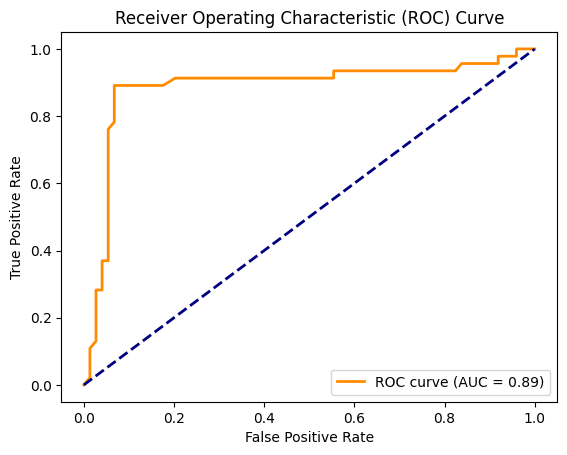

In [146]:
# Get predicted probabilities for the positive class (class 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Set threshold to 0.5 and classify as positive if probability >= 0.5
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)  # Apply threshold

# Confusion Matrix at threshold 0.5
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix at Threshold {threshold}:\n{conf_matrix}")

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # Using predicted probabilities for ROC curve
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Print AUC score
print(f"AUC at threshold {threshold}: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Conclusion

In this practical, we explored clustering using KMeans and evaluated model performance using the silhouette coefficient. We also compared clustering results with and without feature scaling, observing how scaling influences cluster structure. Additionally, we implemented logistic regression on synthetic data, evaluating the model with metrics like accuracy, F1 score, and AUC, and visualized the performance with an ROC curve.